In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(".."))
from src.data_setup import load_data, split_cities
from src.visualization import (
    missing_data_percentage_by_city,
    weekly_cases_by_year,
    distribution_plots,
    weekly_cases,
    pairplot,
    plot_heatmap,
    plot_correlation_with_total_cases,
    train_vs_test_distribution,
    train_vs_test_features,
    visualize_comparision
)

### **Data description** ###
#### **City and date indicators** ####
- ```city``` - City abbreviations: sj for San Juan and iq for Iquitos
- ```week_start_date``` - Date given in yyyy-mm-dd format
#### **NOAA's GHCN daily climate data weather station measurements** ####
- ```station_max_temp_c``` - Maximum temperature
- ```station_min_temp_c``` - Minimum temperature
- ```station_avg_temp_c``` - Average temperature
- ```station_precip_mm``` - Total precipitation
- ```station_diur_temp_rng_c``` - Diurnal temperature range
#### **PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)** ####
- ```precipitation_amt_mm``` - Total precipitation
#### **NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)** ####
- ```reanalysis_sat_precip_amt_mm``` - Total precipitation
- ```reanalysis_dew_point_temp_k``` - Mean dew point temperature
- ```reanalysis_air_temp_k``` - Mean air temperature
- ```reanalysis_relative_humidity_percent``` - Mean relative humidity
- ```reanalysis_specific_humidity_g_per_kg``` - Mean specific humidity
- ```reanalysis_precip_amt_kg_per_m2``` - Total precipitation
- ```reanalysis_max_air_temp_k``` - Maximum air temperature
- ```reanalysis_min_air_temp_k``` - Minimum air temperature
- ```reanalysis_avg_temp_k``` - Average air temperature
- ```reanalysis_tdtr_k``` - Diurnal temperature range
#### **Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale)** ####
- ```ndvi_se``` - Pixel southeast of city centroid
- ```ndvi_sw``` - Pixel southwest of city centroid
- ```ndvi_ne``` - Pixel northeast of city centroid
- ```ndvi_nw``` - Pixel northwest of city centroid

In [2]:
features_train, labels_train = load_data(train=True)

In [3]:
sj_features_train, iq_features_train = split_cities(features_train)
sj_labels_train, iq_labels_train = split_cities(labels_train)

In [4]:
features_train.describe()

ndvi_ne      ndvi_nw      ndvi_se      ndvi_sw  \
count  1262.000000  1404.000000  1434.000000  1434.000000   
mean      0.142294     0.130553     0.203783     0.202305   
std       0.140531     0.119999     0.073860     0.083903   
min      -0.406250    -0.456100    -0.015533    -0.063457   
25%       0.044950     0.049217     0.155087     0.144209   
50%       0.128817     0.121429     0.196050     0.189450   
75%       0.248483     0.216600     0.248846     0.246982   
max       0.508357     0.454429     0.538314     0.546017   

       precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
count           1443.000000            1446.000000            1446.000000   
mean              45.760388             298.701852             299.225578   
std               43.715537               1.362420               1.261715   
min                0.000000             294.635714             294.892857   
25%                9.800000             297.658929             298.257143   
50%               38.340000             298.646429             299.289286   
75%               70.235000             299.833571             300.207143   
max              390.600000             302.200000             302.928571   

       reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
count                  1446.000000                1446.000000   
mean                    295.246356                 303.427109   
std                       1.527810                   3.234601   
min                     289.642857                 297.800000   
25%                     294.118929                 301.000000   
50%                     295.640714                 302.400000   
75%                     296.460000                 305.500000   
max                     298.450000                 314.000000   

       reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
count                1446.000000                      1446.000000   
mean                  295.719156                        40.151819   
std                     2.565364                        43.434399   
min                   286.900000                         0.000000   
25%                   293.900000                        13.055000   
50%                   296.200000                        27.245000   
75%                   297.900000                        52.200000   
max                   299.900000                       570.500000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                           1446.000000                   1443.000000   
mean                              82.161959                     45.760388   
std                                7.153897                     43.715537   
min                               57.787143                      0.000000   
25%                               77.177143                      9.800000   
50%                               80.301429                     38.340000   
75%                               86.357857                     70.235000   
max                               98.610000                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                            1446.000000        1446.000000   
mean                               16.746427           4.903754   
std                                 1.542494           3.546445   
min                                11.715714           1.357143   
25%                                15.557143           2.328571   
50%                                17.087143           2.857143   
75%                                17.978214           7.625000   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count         1413.000000              1413.000000         1436.000000   
mean            27.185783                 8.059328           32.452437   
std              1.292347              

### **Missing data** ###

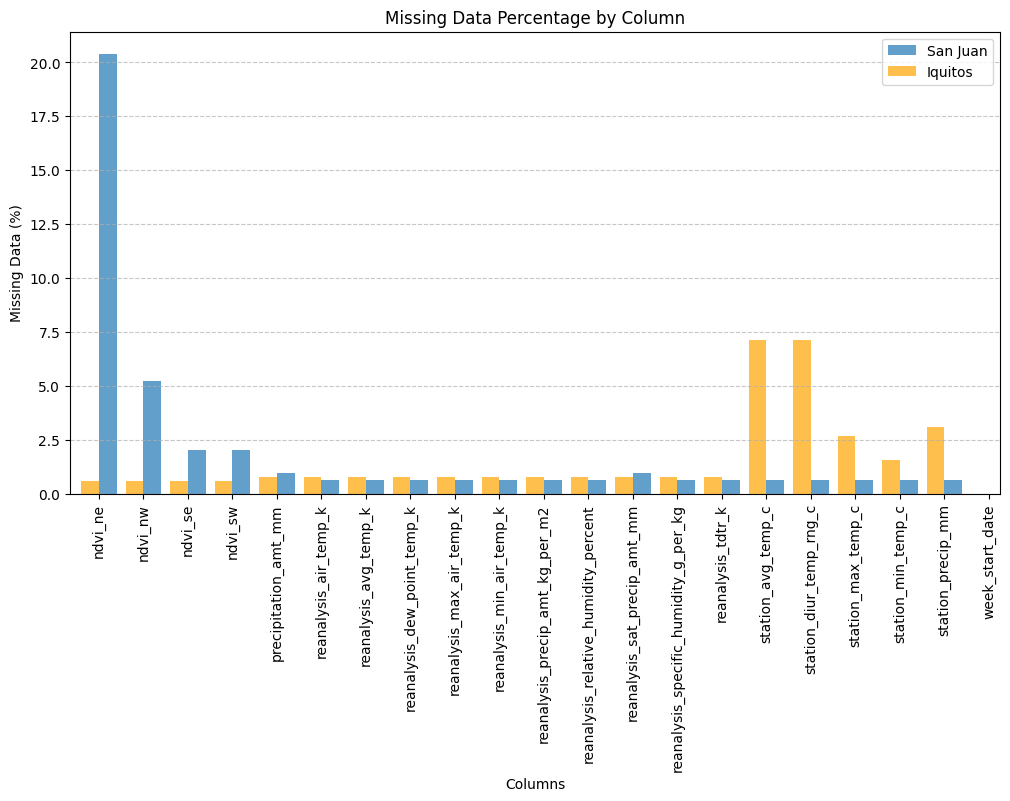

In [5]:
missing_data_percentage_by_city(sj_features_train, iq_features_train)

### **Total cases over time** ###


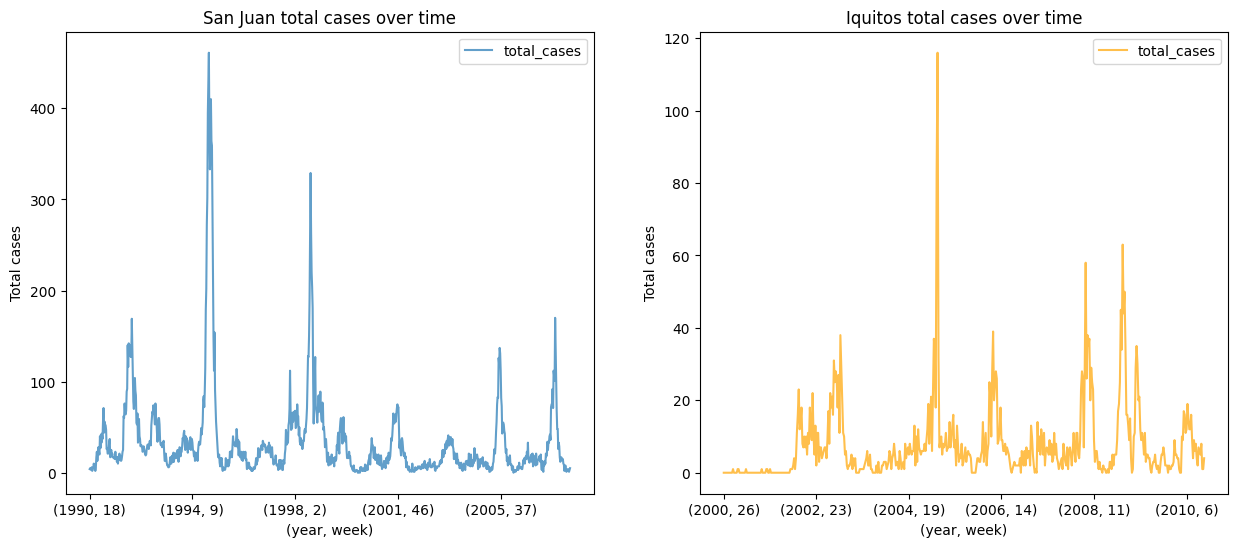

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=False)
sj_labels_train.plot(
    alpha=0.7,
    ax=axes[0],
    title="San Juan total cases over time",
    xlabel="(year, week)",
    ylabel="Total cases",
)
iq_labels_train.plot(
    alpha=0.7,
    color="orange",
    ax=axes[1],
    title="Iquitos total cases over time",
    xlabel="(year, week)",
    ylabel="Total cases",
)

plt.show()

### **Weekly cases** ###

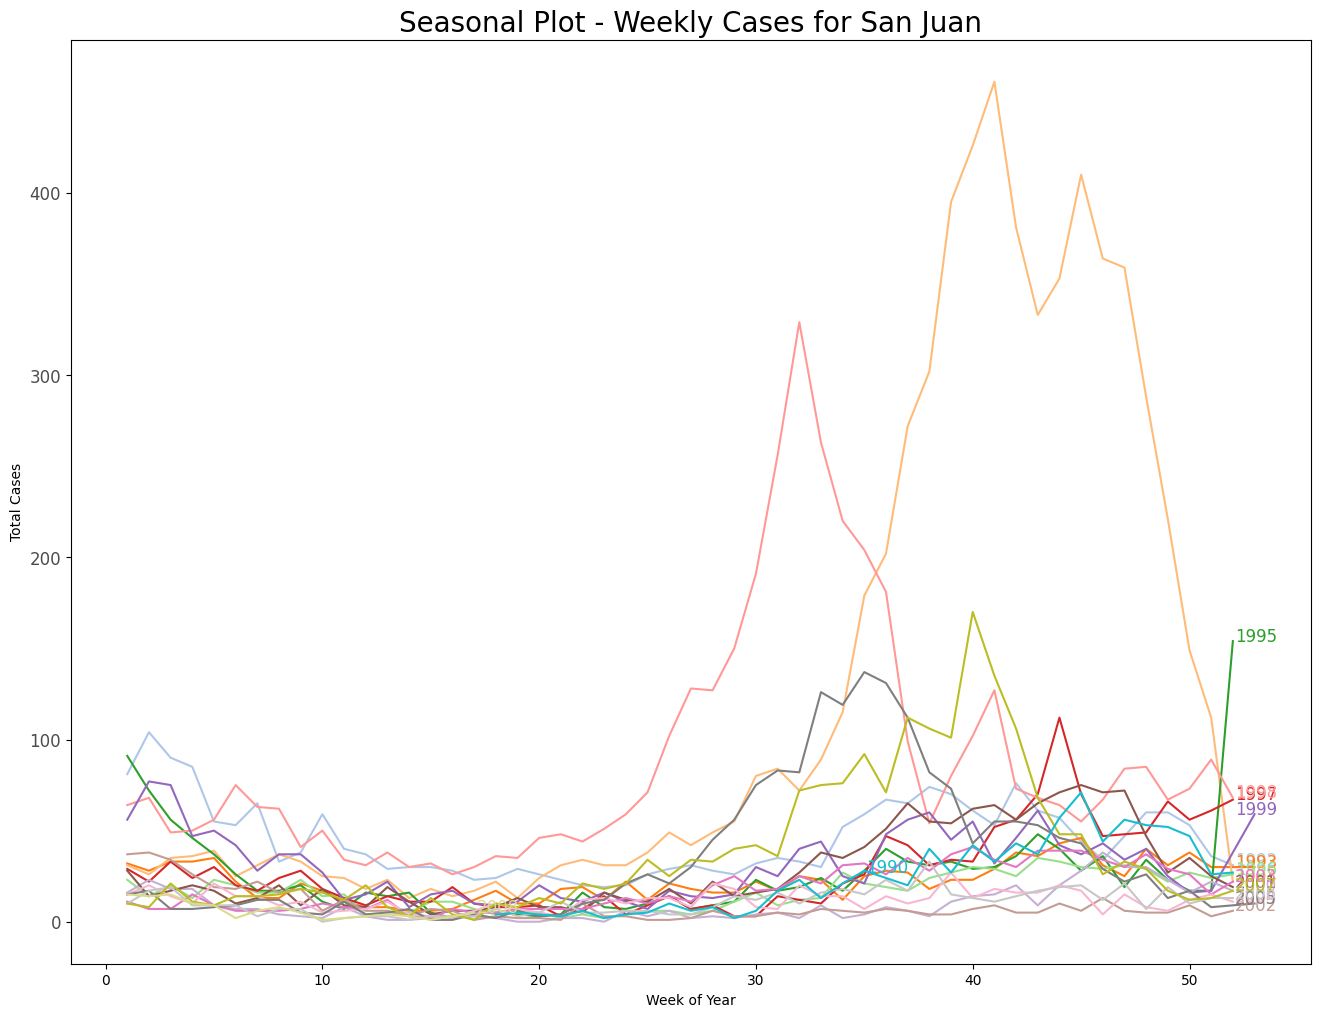

In [7]:
weekly_cases_by_year(sj_labels_train, city="San Juan")

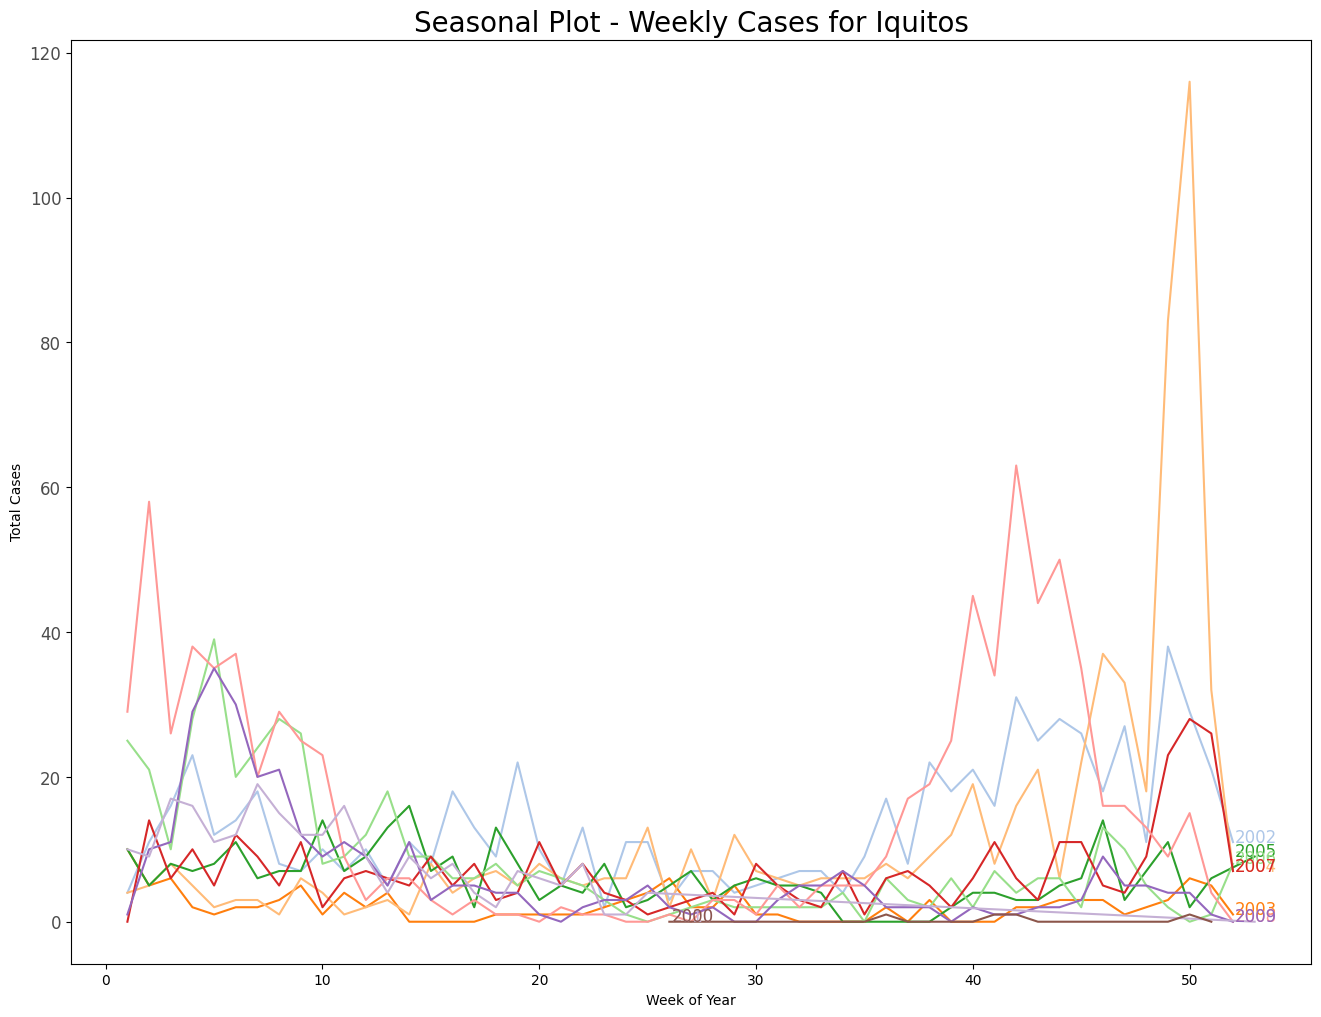

In [8]:
weekly_cases_by_year(iq_labels_train, city="Iquitos")

### **Features comparision** ###

From the plots above, we can see that each year experienced an epidemic peak in cases. Below, we compare various statistics between the whole year and the pre-peak period.

Komentarz na brudno: tutaj mozna posprawdzac rozne cechy wpisujac w to_compare i stestowac rozne okresy przed peakiem wpisujac period(ile tygodni przed peakiem) jako argument.

narazie pokazuje te ktore (jakos) ciekawie wyszly, mozna tu jeszcze poszukac czegos fajnego.

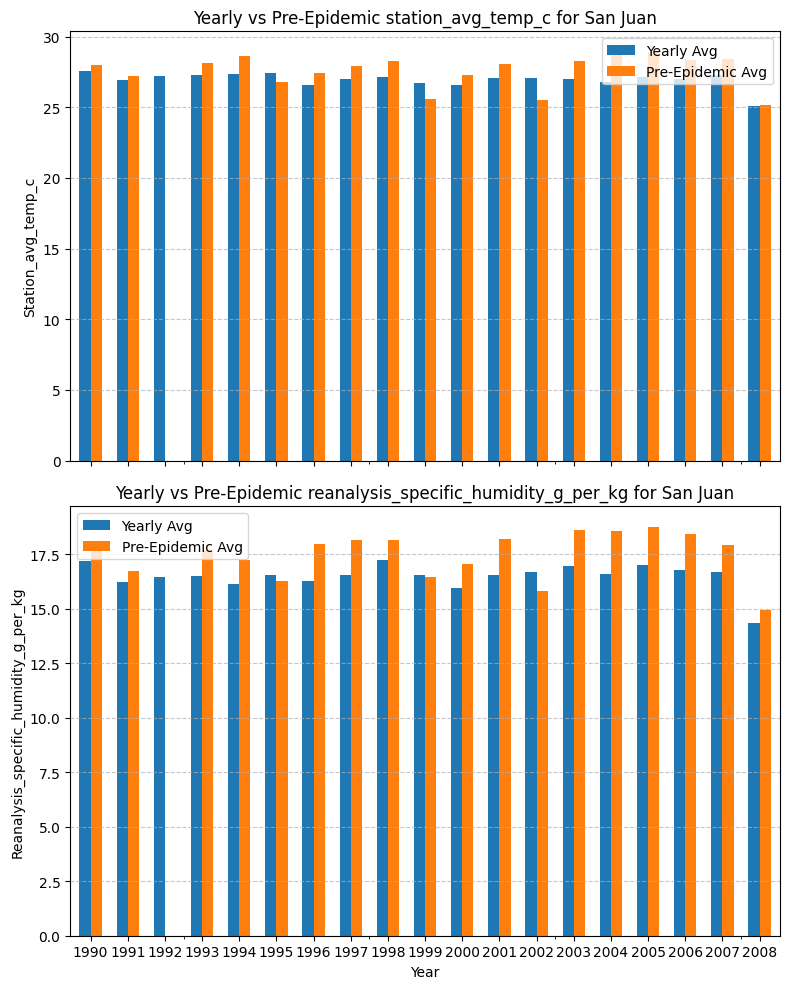

In [7]:
to_compare = ["station_avg_temp_c", "reanalysis_specific_humidity_g_per_kg"]

visualize_comparision(sj_features_train,
                      sj_labels_train,
                      period=6,
                      to_compare=to_compare,
                      city="San Juan")

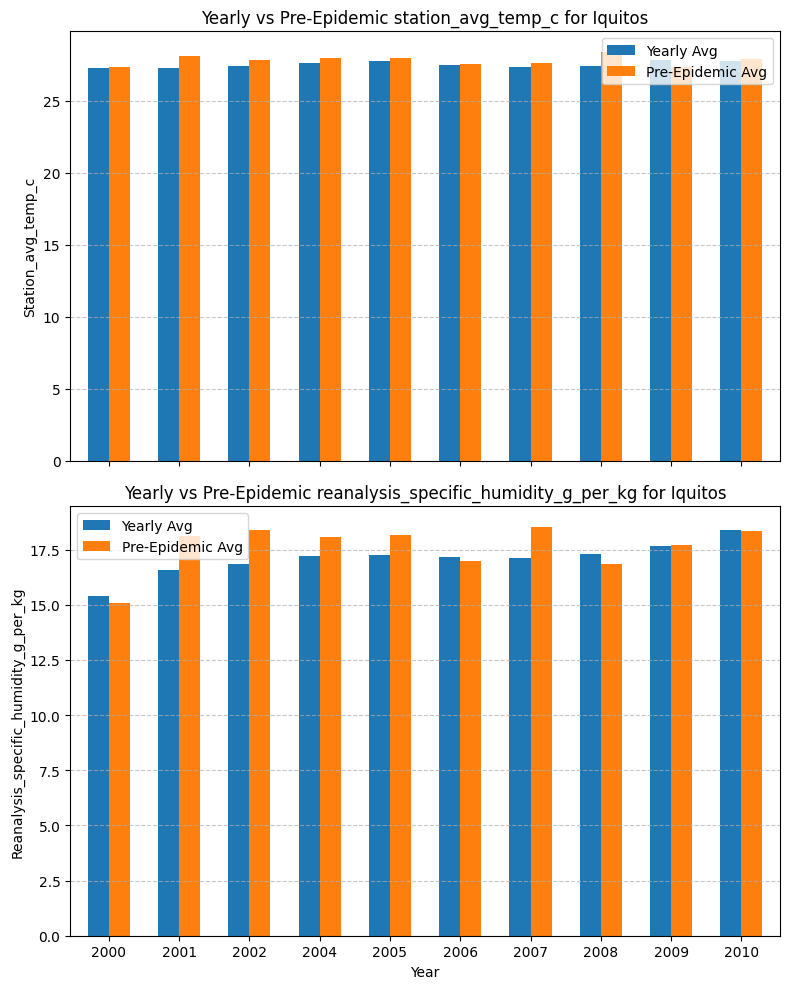

In [6]:
visualize_comparision(iq_features_train,
                      iq_labels_train,
                      period=6,
                      to_compare=to_compare,
                      city="Iquitos")

From the plots above, we can see that the disease typically spreads more during hotter and more humid periods.

### **Correlation beteween features and total cases** ###

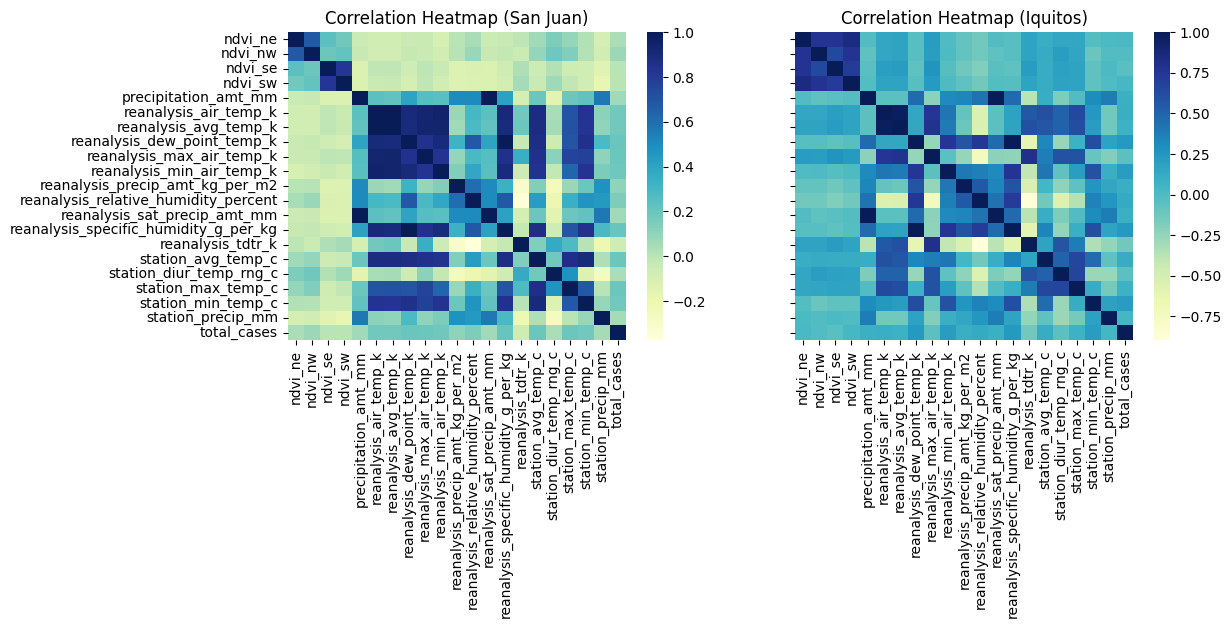

In [9]:
sj_data_train = sj_features_train.copy()
sj_data_train["total_cases"] = sj_labels_train.total_cases
iq_data_train = iq_features_train.copy()
iq_data_train["total_cases"] = iq_labels_train.total_cases

plot_heatmap(sj_data_train, iq_data_train)

In [10]:
plot_correlation_with_total_cases(sj_data_train, iq_data_train)

Correlation between features and total cases depends on the city. This means that we will have to build a model for each city.

### **Features distribution** ###

In [11]:
distribution_plots(
    sj_features_train.drop(features_train.columns[0], axis=1),
    iq_features_train.drop(features_train.columns[0], axis=1),
)

### **Pairplot** ###

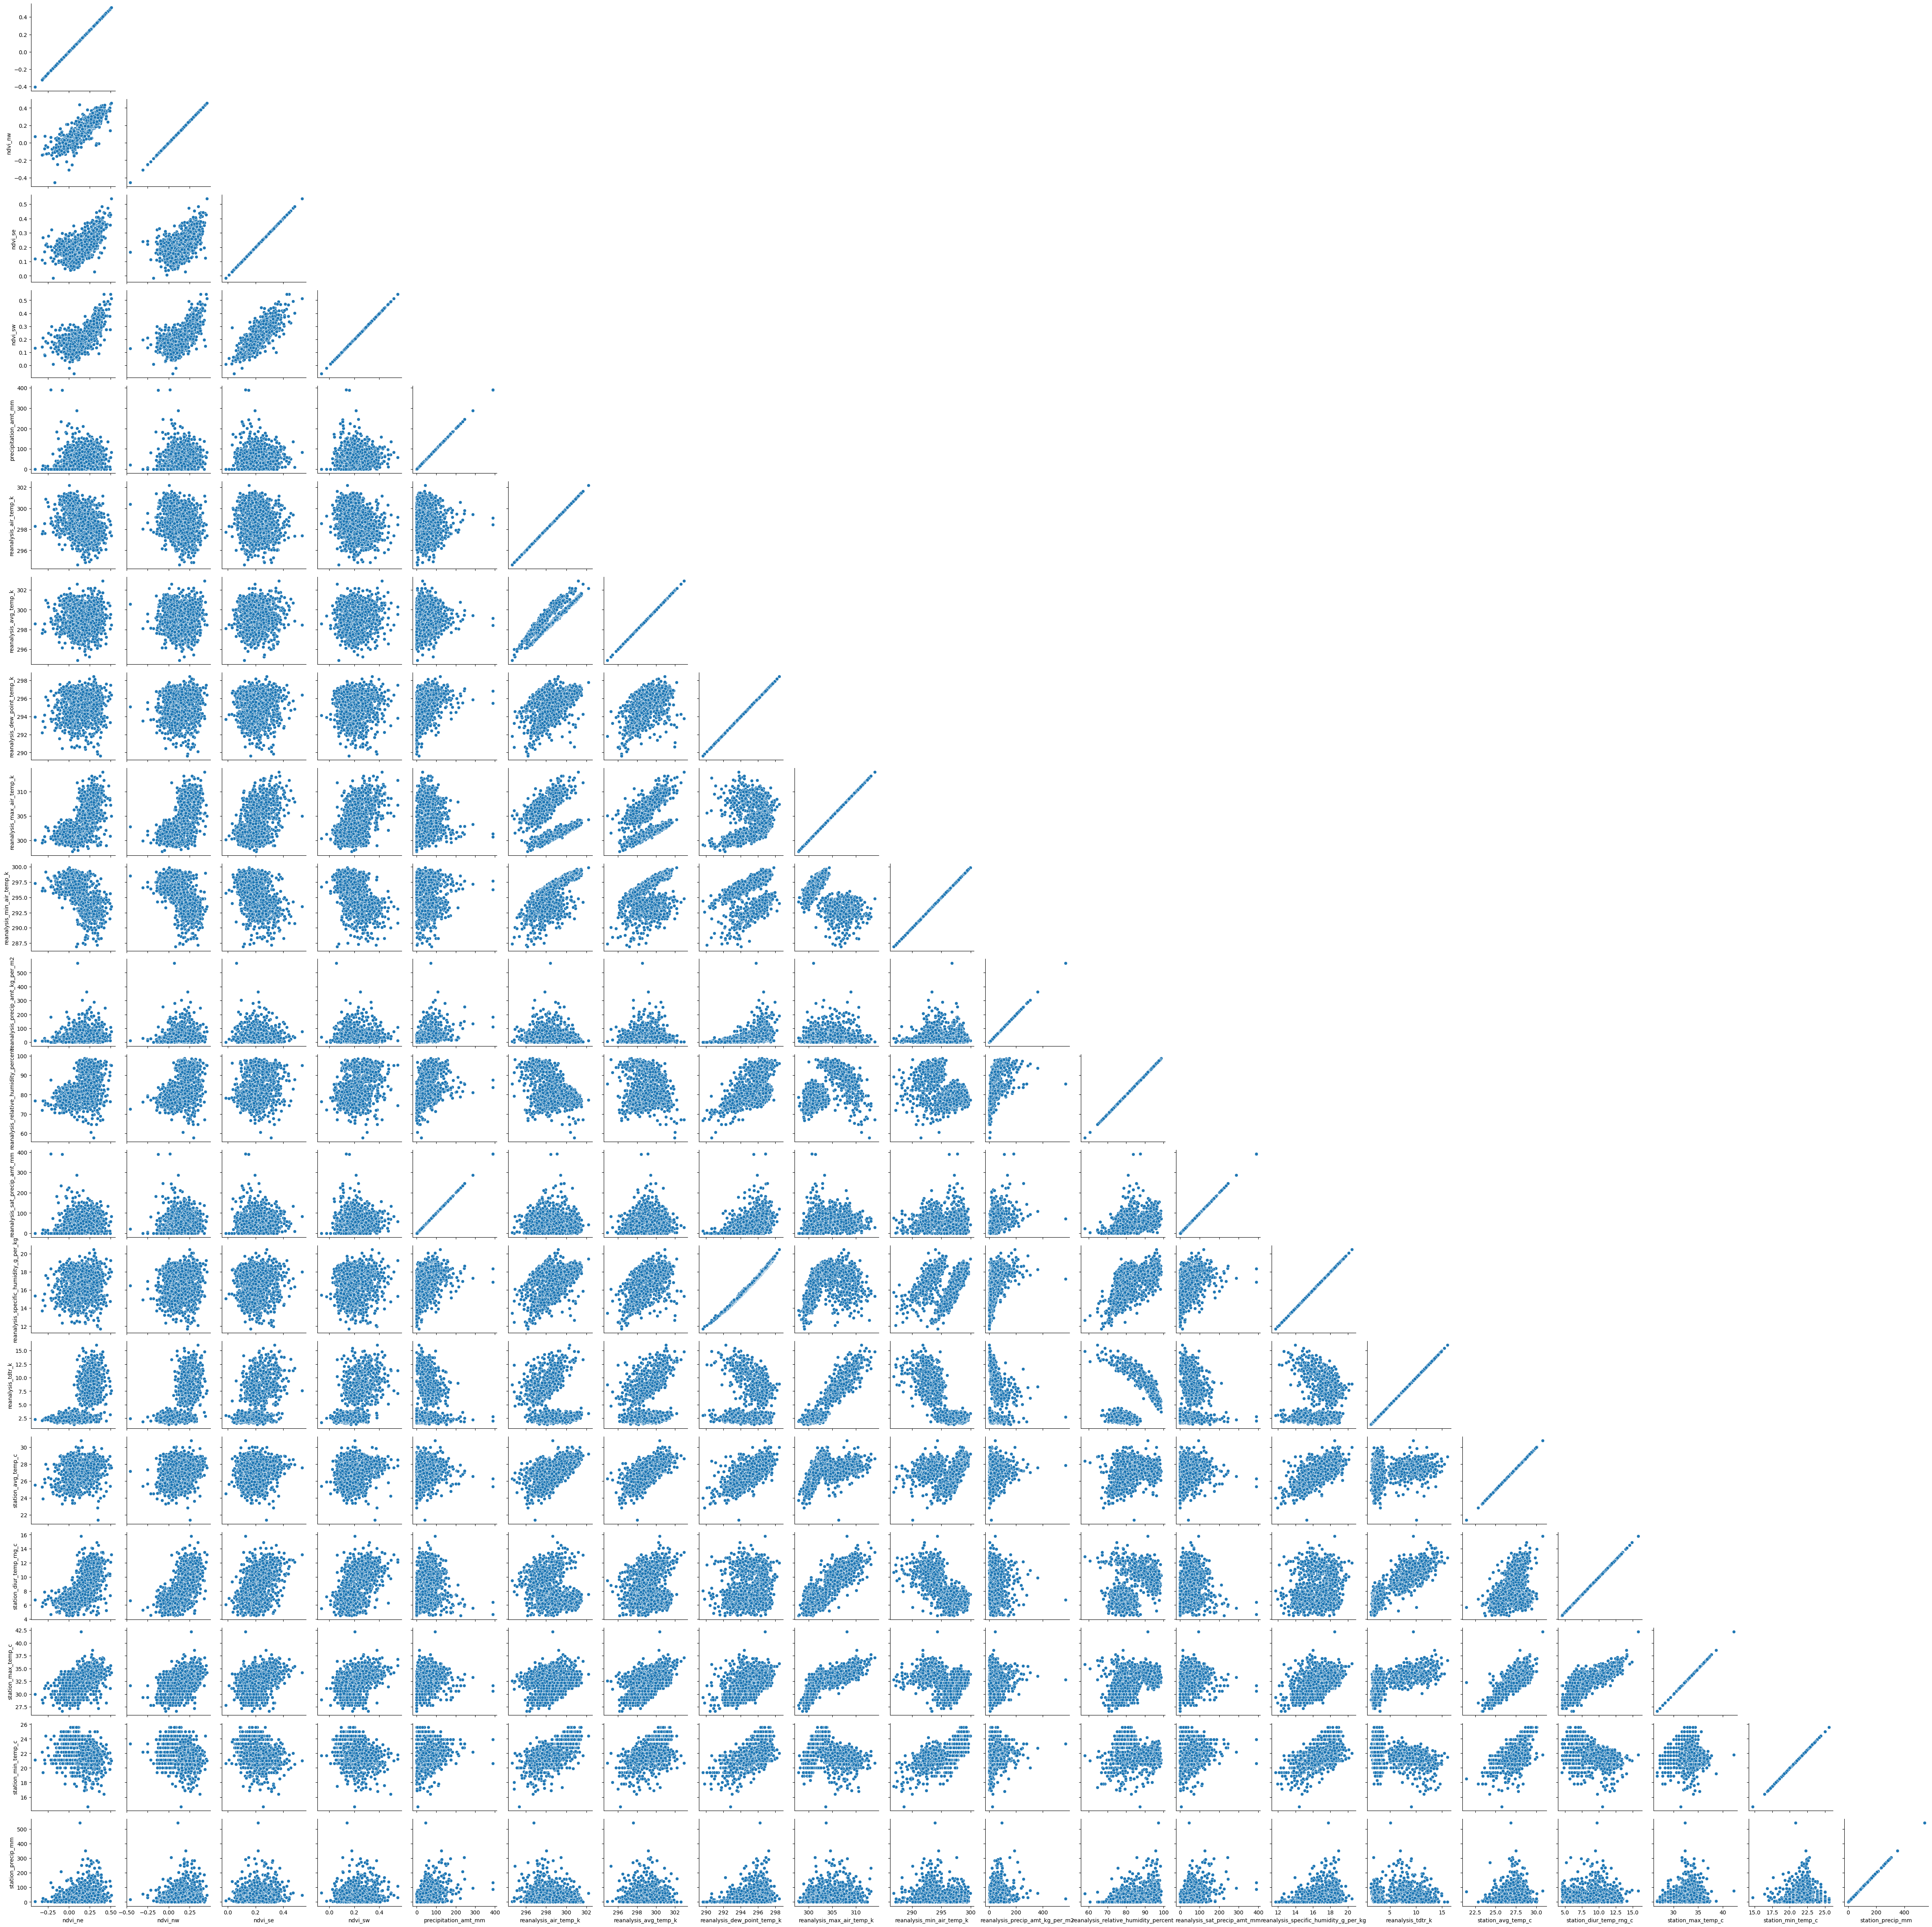

In [12]:
pairplot(features_train)

### **Weekly cases** ###

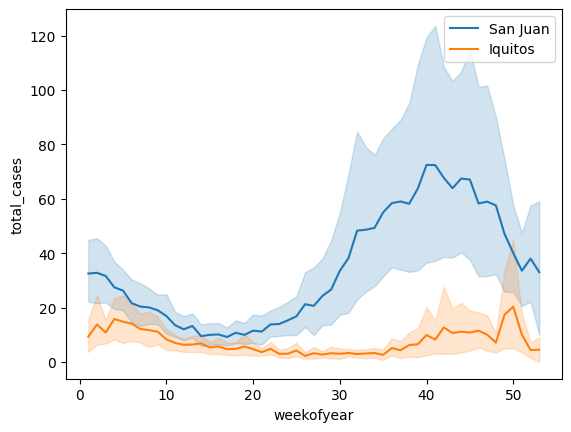

In [13]:
weekly_cases(data=sj_labels_train, city="San Juan")
weekly_cases(data=iq_labels_train, city="Iquitos")

In [14]:
features_test, labels_test = load_data(train=False)

In [15]:
features_train_copy = features_train.copy()
features_train_copy["dataset"] = "Train"
features_test_copy = features_test.copy()
features_test_copy["dataset"] = "Test"
concatenated_data = pd.concat([features_train_copy, features_test_copy])

### **What are we going to predict?** ###

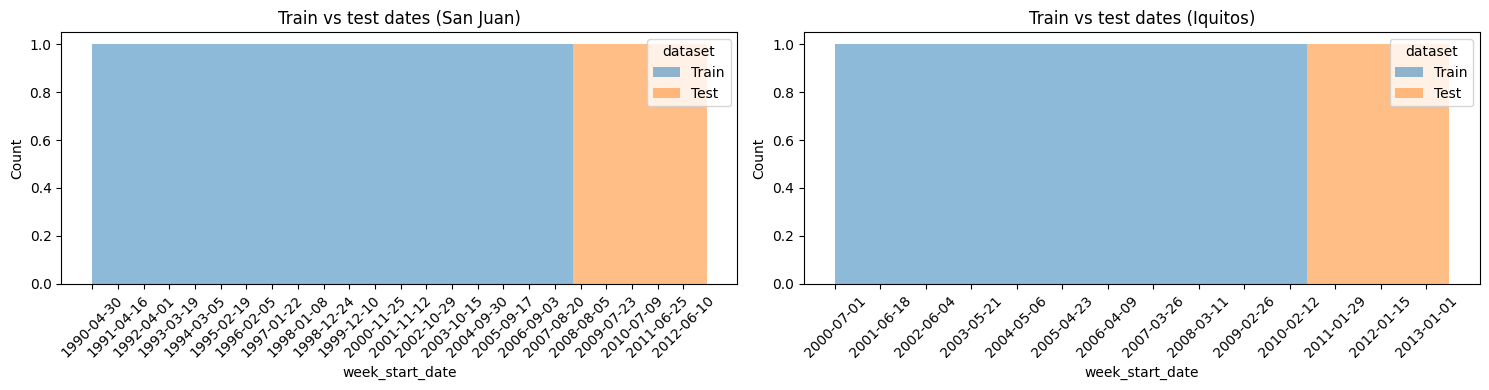

In [16]:
concatenated_data_sj = concatenated_data.loc["sj"]
concatenated_data_iq = concatenated_data.loc["iq"]
train_vs_test_distribution(concatenated_data_sj, concatenated_data_iq)

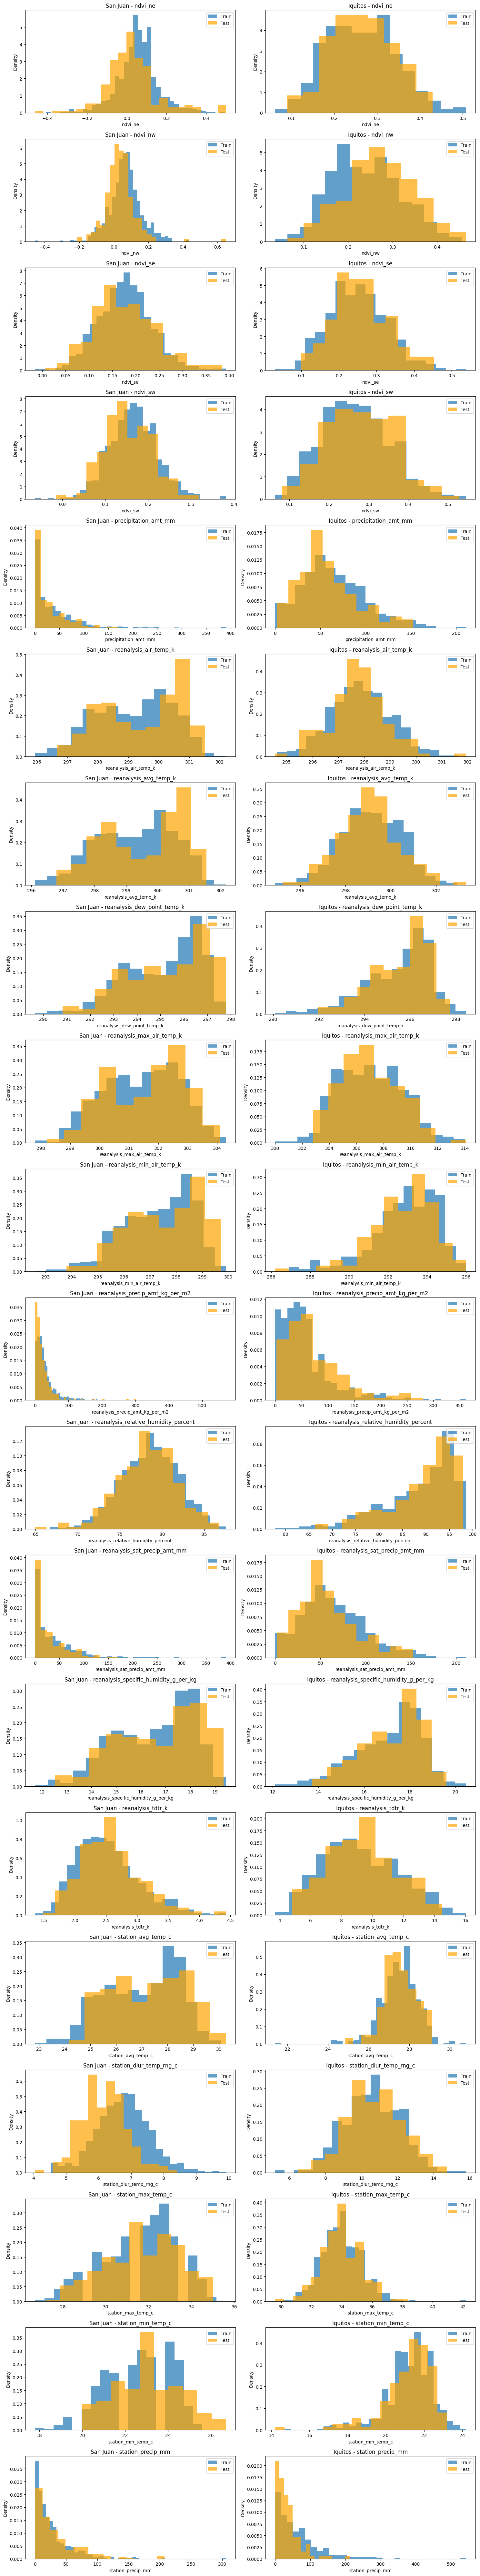

In [17]:
concatenated_data_sj = concatenated_data.loc["sj"].drop(columns=["week_start_date"])
concatenated_data_iq = concatenated_data.loc["iq"].drop(columns=["week_start_date"])
train_vs_test_features(concatenated_data_sj, concatenated_data_iq)

The distribution of features in train and test data is similar, so the fact that the split is not random should not affect the model.

### **Conculsions** ###
1. Each city has different features that are correlated with the total cases.
2. Each city requires each own feature engineering (data imputation, feature selection, feature scaling, etc.).
3. We have to build a model for each city.
4. We have to predict the total cases for the future (with respect to the training data).